In [1]:
!pip install beautifulsoup4 requests
!pip install fsspec

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import fsspec

In [4]:
Angels_url = "https://www.mlbtraderumors.com/los-angeles-angels"
response = requests.get(Angels_url)
# Parse the HTML content using BeautifulSoup
Beaut_soup = BeautifulSoup(response.content, "html.parser")
article = Beaut_soup.find_all("article")

In [6]:
# Create a file to save the scraped data
file_path = "C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/angels.txt" 
with open(file_path, "w", encoding="utf-8") as file:
    # Initialize empty lists to store the extracted values
    titles = []
    authors = []
    dates = []
    contents = []
    
    # Iterate over the articles and extract the text
    for article in article:
        # Extract the article title
        title_element = article.find("h2")
        title = title_element.text.strip() if title_element else ""
        titles.append(title)

        # Extract the article author
        author_element = article.find("span", class_="entry-author")
        author = author_element.text.strip() if author_element else ""
        authors.append(author)

        # Extract the article date
        date_element = article.find("time", class_="entry-time")
        date = date_element.text.strip() if date_element else ""
        dates.append(date)

        # Extract the article content
        content_element = article.find("div", class_="entry-content")
        content = content_element.text.strip() if content_element else ""
        contents.append(content)
        
        # Write the title and content to the file
        file.write("Title: " + title + "\n")
        file.write("Author: " + author + "\n")
        file.write("Date: " + date + "\n")
        file.write("Content: " + content + "\n")
        file.write("---\n")

print("Data saved to", file_path)

# Create a DataFrame from the extracted values
data = {
    "Title": titles,
    "Author": authors,
    "Date": dates,
    "Content": contents
}

df = pd.DataFrame(data)
df.head()

Data saved to C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/angels.txt


,Title,Author,Date,Content
0,Angels Select Gerardo Reyes,Darragh McDonald,"June 10, 2023",The Angels announced that they have selected t...
1,Jose Suarez Has Yet To Begin Throwing,Anthony Franco,"June 7, 2023",The Angels have been without starter José Suar...
2,Upcoming Club Option Decisions: AL West,Anthony Franco,"June 6, 2023","Last week, MLBTR took an early look at offseas..."
3,Best Deadline Rental Returns In Recent History...,Steve Adams,"June 5, 2023","The calendar has flipped to June, and more tha..."
4,MLB Hires Albert Pujols As Special Assistant,Steve Adams,"June 5, 2023",Recently retired slugger Albert Pujols has bee...


In [8]:
Attendance_url = "https://www.baseball-reference.com/teams/ANA/attend.shtml"

# Read the HTML table into a list of DataFrames
tables = pd.read_html(Attendance_url)

# Select the table of interest (index 0 in this case)
table = tables[0]

In [9]:
Angels_Attendance = "C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/Angels_Attendance.csv"
Angels_Attendance

'C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/Angels_Attendance.csv'

In [10]:
path = "C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/"

Angels_Attendance = pd.DataFrame(pd.read_csv(path + 'Angels_Attendance.csv'))
Angels_Attendance

,Year,Tm,Lg,W,L,Finish,Playoffs,Attendance,Attend/G,Rank,Est. Payroll,PPF,BPF,Stadium
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.0,Los Angeles Angels,AL West,35.0,31.0,3.0,NaN,"1,053,117","31,913",4th of 15,"$224,228,095",103.0,103.0,Angel Stadium of Anaheim
2,2022.0,Los Angeles Angels,AL West,73.0,89.0,3.0,NaN,"2,457,461","30,339",5th of 15,"$177,063,095",103.0,103.0,Angel Stadium of Anaheim
3,2021.0,Los Angeles Angels,AL West,77.0,85.0,4.0,NaN,"1,515,689","18,484",6th of 15,"$188,408,595",103.0,103.0,Angel Stadium of Anaheim
4,2020.0,Los Angeles Angels,AL West,26.0,34.0,4.0,NaN,NaN,NaN,8th of 15,"$181,254,762",102.0,101.0,Angel Stadium of Anaheim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1965.0,California Angels,AL,75.0,87.0,7.0,NaN,"566,727","7,084",8th of 10,NaN,97.0,97.0,Dodger Stadium
60,1964.0,Los Angeles Angels,AL,82.0,80.0,5.0,NaN,"760,439","9,388",7th of 10,NaN,91.0,90.0,Dodger Stadium
61,1963.0,Los Angeles Angels,AL,70.0,91.0,9.0,NaN,"821,015","10,136",5th of 10,NaN,94.0,94.0,Dodger Stadium
62,1962.0,Los Angeles Angels,AL,86.0,76.0,3.0,NaN,"1,144,063","14,124",4th of 10,NaN,97.0,97.0,Dodger Stadium


In [12]:
Angels_05_df = pd.DataFrame(pd.read_csv(path + 'Angels_Attendance.csv'))
Angels_05_df = Angels_05_df[Angels_05_df["Year"] > 2004]
Angels_05_df

,Year,Tm,Lg,W,L,Finish,Playoffs,Attendance,Attend/G,Rank,Est. Payroll,PPF,BPF,Stadium
1,2023.0,Los Angeles Angels,AL West,35.0,31.0,3.0,NaN,"1,053,117","31,913",4th of 15,"$224,228,095",103.0,103.0,Angel Stadium of Anaheim
2,2022.0,Los Angeles Angels,AL West,73.0,89.0,3.0,NaN,"2,457,461","30,339",5th of 15,"$177,063,095",103.0,103.0,Angel Stadium of Anaheim
3,2021.0,Los Angeles Angels,AL West,77.0,85.0,4.0,NaN,"1,515,689","18,484",6th of 15,"$188,408,595",103.0,103.0,Angel Stadium of Anaheim
4,2020.0,Los Angeles Angels,AL West,26.0,34.0,4.0,NaN,NaN,NaN,8th of 15,"$181,254,762",102.0,101.0,Angel Stadium of Anaheim
5,2019.0,Los Angeles Angels,AL West,72.0,90.0,4.0,NaN,"3,023,012","37,321",2nd of 15,"$158,078,584",100.0,100.0,Angel Stadium of Anaheim
6,2018.0,Los Angeles Angels,AL West,80.0,82.0,4.0,NaN,"3,020,216","37,287",2nd of 15,"$166,849,666",98.0,98.0,Angel Stadium of Anaheim
7,2017.0,Los Angeles Angels,AL West,80.0,82.0,2.0,NaN,"3,019,585","37,279",3rd of 15,"$181,125,500",97.0,97.0,Angel Stadium of Anaheim
8,2016.0,Los Angeles Angels,AL West,74.0,88.0,4.0,NaN,"3,016,142","37,236",3rd of 15,"$139,712,000",95.0,95.0,Angel Stadium of Anaheim
9,2015.0,Los Angeles Angels of Anaheim,AL West,85.0,77.0,3.0,NaN,"3,012,765","37,195",2nd of 15,"$131,522,500",94.0,94.0,Angel Stadium of Anaheim
10,2014.0,Los Angeles Angels of Anaheim,AL West,98.0,64.0,1.0,Lost ALDS (3-0),"3,095,935","38,221",2nd of 15,"$128,667,000",94.0,95.0,Angel Stadium of Anaheim


In [13]:
Angels_05_df['Est. Payroll'] = Angels_05_df['Est. Payroll'].replace({'\$':''}, regex = True)
Angels_05_df['Est. Payroll'] = Angels_05_df['Est. Payroll'].replace({'\,':''}, regex = True)
Angels_05_df['Attendance'] = Angels_05_df['Attendance'].replace({'\,':''}, regex = True)

Text(0.5, 1.0, 'Dodgers Attendance per year since 2005')

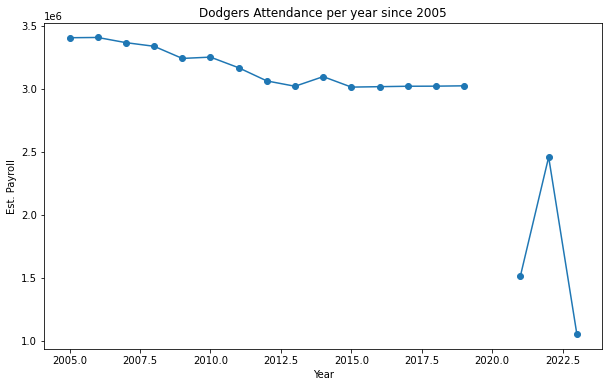

In [14]:
#plot data
Angels_05_df['Attendance'] = Angels_05_df['Attendance'].astype(float)
Angels_05_df.dtypes
# Plotting
plt.figure(figsize=(10, 6))

# Plotting Attendance over the years
plt.plot(Angels_05_df['Year'], Angels_05_df['Attendance'], marker='o')
plt.xlabel('Year')
plt.ylabel('Est. Payroll')
plt.title('Angels Attendance per year since 2005')

Text(0.5, 1.0, 'Dodgers Payroll per year since 2005')

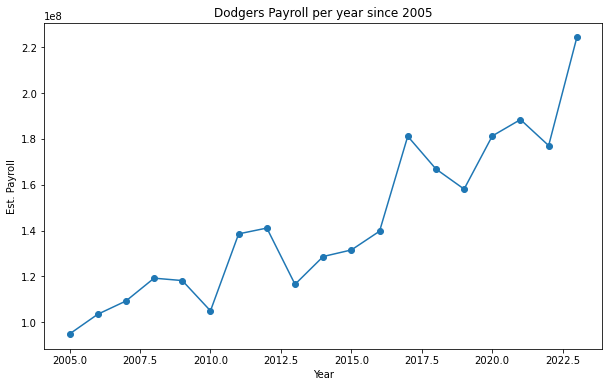

In [15]:
#plot data
Angels_05_df['Est. Payroll'] = Angels_05_df['Est. Payroll'].astype(float)
Angels_05_df.dtypes
# Plotting
plt.figure(figsize=(10, 6))

# Plotting Attendance over the years
plt.plot(Angels_05_df['Year'], Angels_05_df['Est. Payroll'], marker='o')
plt.xlabel('Year')
plt.ylabel('Est. Payroll')
plt.title('Angels Payroll per year since 2005')

Text(0.5, 0, 'Finish')

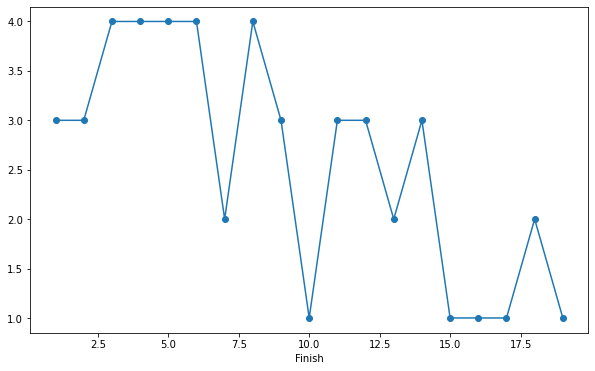

In [16]:
plt.figure(figsize=(10, 6))

# Plotting Attendance over the years
plt.plot(Angels_05_df['Finish'], marker='o')
plt.xlabel('Finish')


Text(0.5, 1.0, 'Angels Rank per year since 2005')

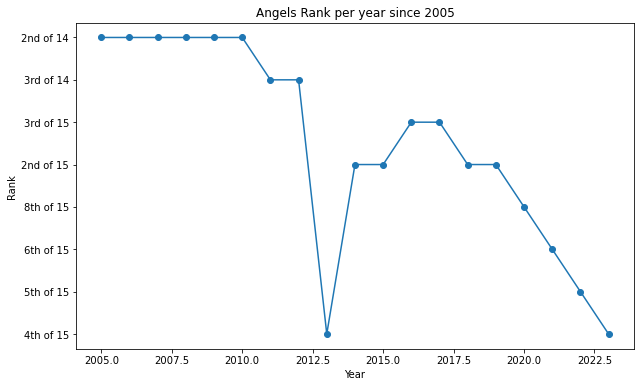

In [17]:
plt.figure(figsize=(10, 6))

# Plotting Attendance over the years
plt.plot(Angels_05_df['Year'], Angels_05_df['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Angels Rank per year since 2005')

In [18]:
corr = Angels_05_df["Est. Payroll"].corr(Angels_05_df['Finish'])
print(corr)

0.5637391640975834
